In [2]:
!pip3 install opencv-python
!pip3 install ffpyplayer
!pip3 install imagehash
!pip3 install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=49ba5eadde56952962c53f70372d47669597c6ec54b8579e868459cdce587d4a
  Stored in directory: c:\users\kevin\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=1748bb15ff113f68bf437128b9f253e28e9577d4aae8716df8c73a359cc6494c
  Stored in directory: c:\users\kevin\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
Successfully built termcolor wrapt
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.11.2
    Uninstalling wrapt-1.11.2:
      Successfully uninstalled wrapt-1.11.2
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0


In [2]:
import glob
import cv2
import numpy as np
from ffpyplayer.player import MediaPlayer
from PIL import Image
import imagehash
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

from tensorflow.keras import optimizers

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

### Loading the data

In [3]:
directory = 'LEGO brick images v1/**/'
img_types = ('*.png', '*.jpg', '*.jpeg') # not type sensitive
img_list, img_titles = [], []
for i in img_types:
    img_list.extend(list(map(Image.open, glob.glob(directory + i, recursive=True))))
    img_titles.extend(list(glob.glob(directory + i, recursive=True)))
    
    


In [4]:
len(img_titles)

6379

In [7]:
directory = 'LEGO brick images v1/'
subdirectories = [x[0] for x in os.walk(directory)][1:]
labels = []
for i in subdirectories:
    labels.append(i.split("/")[-1])
labels

['11214 Bush 3M friction with Cross axle',
 '18651 Cross Axle 2M with Snap friction',
 '2357 Brick corner 1x2x2',
 '3003 Brick 2x2',
 '3004 Brick 1x2',
 '3005 Brick 1x1',
 '3022 Plate 2x2',
 '3023 Plate 1x2',
 '3024 Plate 1x1',
 '3040 Roof Tile 1x2x45deg',
 '3069 Flat Tile 1x2',
 '32123 half Bush',
 '3673 Peg 2M',
 '3713 Bush for Cross Axle',
 '3794 Plate 1X2 with 1 Knob',
 '6632 Technic Lever 3M']

In [8]:
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(path + img)
    return np.array(data)

In [9]:
df = get_data(directory)

<ipython-input-8-110869aec8cc>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)


In [10]:
len(df)

6379

### Visualize the data

C:\Users\Kevin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '11214 Bush 3M friction with Cross axle'),
 Text(1, 0, '18651 Cross Axle 2M with Snap friction'),
 Text(2, 0, '2357 Brick corner 1x2x2'),
 Text(3, 0, '3003 Brick 2x2'),
 Text(4, 0, '3004 Brick 1x2'),
 Text(5, 0, '3005 Brick 1x1'),
 Text(6, 0, '3022 Plate 2x2'),
 Text(7, 0, '3023 Plate 1x2'),
 Text(8, 0, '3024 Plate 1x1'),
 Text(9, 0, '3040 Roof Tile 1x2x45deg'),
 Text(10, 0, '3069 Flat Tile 1x2'),
 Text(11, 0, '32123 half Bush'),
 Text(12, 0, '3673 Peg 2M'),
 Text(13, 0, '3713 Bush for Cross Axle'),
 Text(14, 0, '3794 Plate 1X2 with 1 Knob'),
 Text(15, 0, '6632 Technic Lever 3M')]

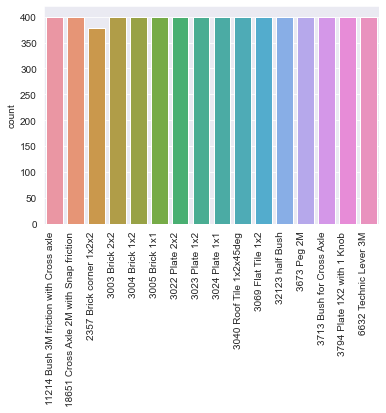

In [39]:
l = []
for i in df:
    l.append(labels[i[1]])
sns.set_style('darkgrid')
ax = sns.countplot(l)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

Text(0.5, 1.0, '11214 Bush 3M friction with Cross axle')

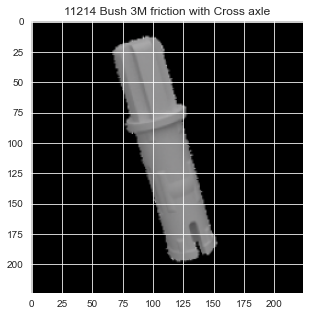

In [12]:
plt.figure(figsize = (5,5))
plt.imshow(df[122][0])
plt.title(labels[df[120][1]])

### Data Preprocessing and Data Augmentation

#### Train-test split

In [14]:
X = [item[0] for item in df]
y = [item[1] for item in df]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

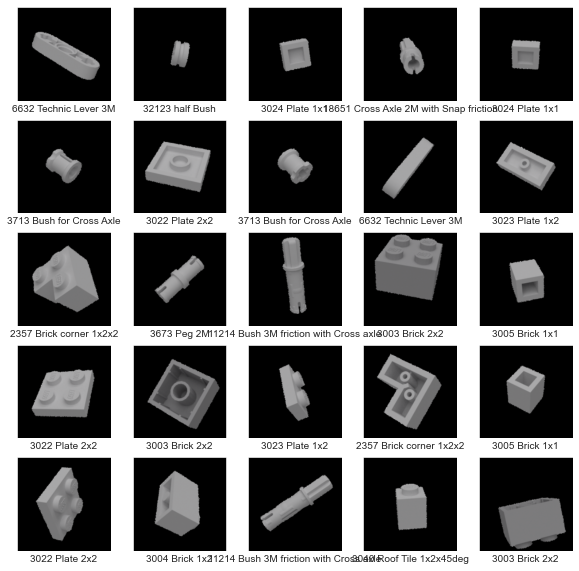

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(labels[y_train[i]])
plt.show()

#### Normalize the data

In [16]:
X_train = np.array(X_train) / 255
X_test = np.array(X_test) / 255

X_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

X_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

#### Data augmentation on the train data:-

In [17]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

### CNN Model

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(img_size, img_size, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(labels))
])

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model.fit(X_train, y_train, epochs=18, validation_data=(X_test, y_test))

Epoch 1/18
160/160 [==============================] - 28s 159ms/step - loss: 2.0093 - accuracy: 0.5632 - val_loss: 1.0394 - val_accuracy: 0.7100
Epoch 2/18
160/160 [==============================] - 19s 121ms/step - loss: 0.7233 - accuracy: 0.7599 - val_loss: 1.2576 - val_accuracy: 0.6983
Epoch 3/18
160/160 [==============================] - 19s 120ms/step - loss: 0.5390 - accuracy: 0.8109 - val_loss: 0.6464 - val_accuracy: 0.7727
Epoch 4/18
160/160 [==============================] - 19s 122ms/step - loss: 0.4050 - accuracy: 0.8470 - val_loss: 0.5149 - val_accuracy: 0.7962
Epoch 5/18
160/160 [==============================] - 19s 121ms/step - loss: 0.3086 - accuracy: 0.8830 - val_loss: 0.4859 - val_accuracy: 0.8143
Epoch 6/18
160/160 [==============================] - 20s 122ms/step - loss: 0.2950 - accuracy: 0.8863 - val_loss: 0.4046 - val_accuracy: 0.8503
Epoch 7/18
160/160 [==============================] - 20s 123ms/step - loss: 0.2265 - accuracy: 0.9114 - val_loss: 0.4181 - val_ac

### Evaluation

In [24]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

40/40 - 1s - loss: 0.3200 - accuracy: 0.8770


In [25]:
predictions = model.predict_classes(X_test)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_test, predictions, target_names = labels))

C:\Users\Kevin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


                                        precision    recall  f1-score   support

11214 Bush 3M friction with Cross axle       0.69      0.75      0.72        95
18651 Cross Axle 2M with Snap friction       0.74      0.52      0.61        88
               2357 Brick corner 1x2x2       0.97      1.00      0.99        69
                        3003 Brick 2x2       0.99      1.00      0.99        91
                        3004 Brick 1x2       0.87      0.97      0.92        70
                        3005 Brick 1x1       0.97      0.87      0.92        71
                        3022 Plate 2x2       0.96      0.96      0.96        75
                        3023 Plate 1x2       0.65      0.53      0.58        78
                        3024 Plate 1x1       0.95      1.00      0.98        80
              3040 Roof Tile 1x2x45deg       0.86      0.89      0.88        76
                    3069 Flat Tile 1x2       0.93      0.88      0.90        85
                       32123 half Bush 

### Make predictions

In [26]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [27]:
predictions = probability_model.predict(X_test)
predictions[0]

array([2.3047975e-03, 4.1618274e-04, 1.1106137e-15, 3.5543840e-15,
       1.9318177e-08, 1.6938305e-10, 2.0982236e-09, 9.7023296e-01,
       8.2444598e-12, 5.4941305e-05, 1.0378678e-02, 2.2371675e-16,
       5.8169125e-08, 1.4017938e-18, 1.6612435e-02, 1.3564685e-08],
      dtype=float32)

In [35]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(labels[predicted_label],
                                100*np.max(predictions_array),
                                labels[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(len(labels)))
    plt.yticks([])
    thisplot = plt.bar(range(len(labels)), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

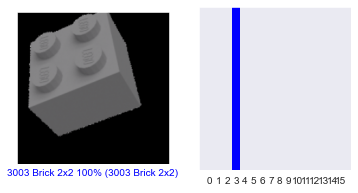

In [36]:
i = len(predictions[i])
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

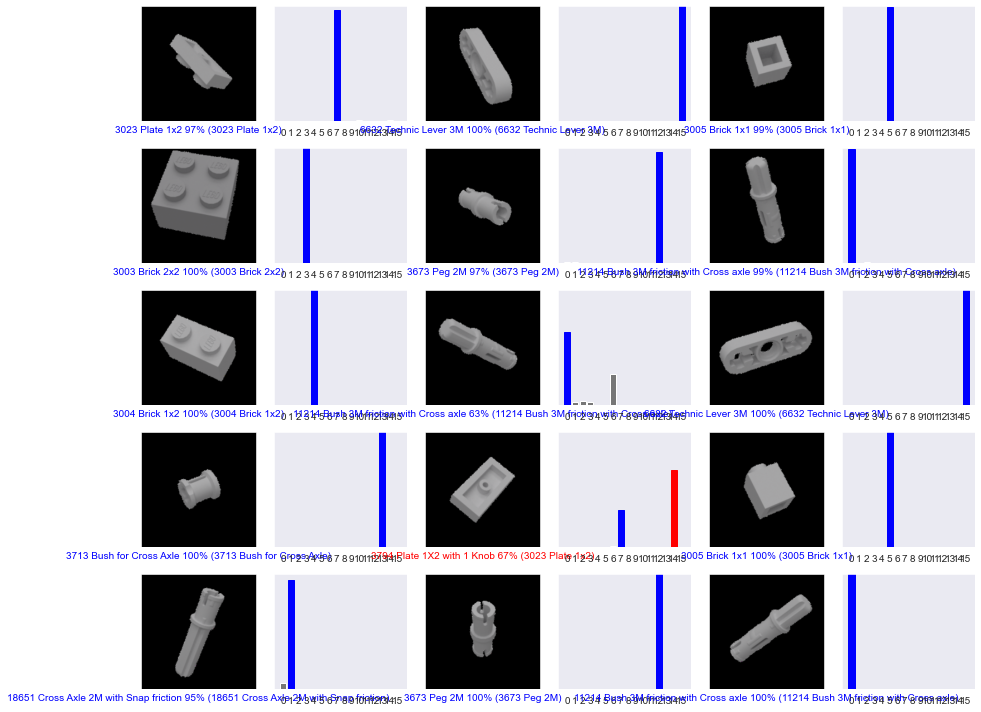

In [37]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()